In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#reading the dataset

df = pd.read_csv(r"C:\Users\Afaque\Downloads\Electric_Vehicle_Population_Data (1).csv")
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033011902
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,53035091100
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,53035092802
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,53035091301
4,JTMAB3FV7P,Thurston,Rainier,WA,98576,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,53067012530


In [32]:
#objective 1- data cleaning

df.shape

(6209, 17)

In [50]:
# Basic EDA: Summary statistics
print("Dataset Overview:\n", df.info())
print("Summary Statistics:", df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 6209 entries, 0 to 6211
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN_(1-10)                                         6209 non-null   object 
 1   County                                             6209 non-null   object 
 2   City                                               6209 non-null   object 
 3   State                                              6209 non-null   object 
 4   Postal_Code                                        6209 non-null   int64  
 5   Model_Year                                         6209 non-null   int64  
 6   Make                                               6209 non-null   object 
 7   Model                                              6209 non-null   object 
 8   Electric_Vehicle_Type                              6209 non-null   object 
 9   Clean_Alterna

In [70]:
# Display the first 5 rows of the DataFrame
print("First 5 Rows:")
print(df.head())

First 5 Rows:
   VIN_(1-10)    County     City State  Postal_Code  Model_Year     Make  \
0  5YJ3E1EBXK      King  Seattle    WA        98178        2019    TESLA   
1  5YJYGDEE3L    Kitsap  Poulsbo    WA        98370        2020    TESLA   
2  KM8KRDAF5P    Kitsap   Olalla    WA        98359        2023  HYUNDAI   
3  5UXTA6C0XM    Kitsap  Seabeck    WA        98380        2021      BMW   
4  JTMAB3FV7P  Thurston  Rainier    WA        98576        2023   TOYOTA   

        Model                   Electric_Vehicle_Type  \
0     MODEL 3          Battery Electric Vehicle (BEV)   
1     MODEL Y          Battery Electric Vehicle (BEV)   
2     IONIQ 5          Battery Electric Vehicle (BEV)   
3          X5  Plug-in Hybrid Electric Vehicle (PHEV)   
4  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   

   Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility  Electric_Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1            Clean Alternative Fuel Vehicl

In [76]:
# Display the last 5 rows of the DataFrame
print("Last 5 Rows:")
print(df.tail())

Last 5 Rows:
      VIN_(1-10) County      City State  Postal_Code  Model_Year      Make  \
6207  7SAYGDEF4P   King      Kent    WA        98042        2023     TESLA   
6208  LPSED3KA2M   King  Bellevue    WA        98006        2021  POLESTAR   
6209  7PDSGBBA5R   King   Bothell    WA        98011        2024    RIVIAN   
6210  7SAYGAEEXN   King   Bothell    WA        98011        2022     TESLA   
6211  5YJ3E1EB7R   King  Issaquah    WA        98029        2024     TESLA   

        Model           Electric_Vehicle_Type  \
6207  MODEL Y  Battery Electric Vehicle (BEV)   
6208      PS2  Battery Electric Vehicle (BEV)   
6209      R1S  Battery Electric Vehicle (BEV)   
6210  MODEL Y  Battery Electric Vehicle (BEV)   
6211  MODEL 3  Battery Electric Vehicle (BEV)   

      Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility  Electric_Range  \
6207  Eligibility unknown as battery range has not b...             0.0   
6208            Clean Alternative Fuel Vehicle Eligible           233.0  

In [80]:
# Remove rows with any missing (NaN) values
df_cleaned = df.dropna()
print("Rows after dropping missing values:", df_cleaned)

Rows after dropping missing values:       VIN_(1-10)    County      City State  Postal_Code  Model_Year      Make  \
0     5YJ3E1EBXK      King   Seattle    WA        98178        2019     TESLA   
1     5YJYGDEE3L    Kitsap   Poulsbo    WA        98370        2020     TESLA   
2     KM8KRDAF5P    Kitsap    Olalla    WA        98359        2023   HYUNDAI   
3     5UXTA6C0XM    Kitsap   Seabeck    WA        98380        2021       BMW   
4     JTMAB3FV7P  Thurston   Rainier    WA        98576        2023    TOYOTA   
...          ...       ...       ...   ...          ...         ...       ...   
6207  7SAYGDEF4P      King      Kent    WA        98042        2023     TESLA   
6208  LPSED3KA2M      King  Bellevue    WA        98006        2021  POLESTAR   
6209  7PDSGBBA5R      King   Bothell    WA        98011        2024    RIVIAN   
6210  7SAYGAEEXN      King   Bothell    WA        98011        2022     TESLA   
6211  5YJ3E1EB7R      King  Issaquah    WA        98029        2024     T

In [86]:
# Count missing values in each column
print("Missing Values per Column:")
print(df.isnull().sum())
# Sum of missing values
print("Total Missing Values:")
print(df.isnull().sum().sum())


Missing Values per Column:
VIN_(1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal_Code                                          0
Model_Year                                           0
Make                                                 0
Model                                                0
Electric_Vehicle_Type                                0
Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility    0
Electric_Range                                       0
Base_MSRP                                            0
Legislative_District                                 0
DOL_Vehicle_ID                                       0
Vehicle_Location                                     0
Electric_Utility                                     0
2020_Census_Tract                                    0
dtype: int64
Total Missing Values:
0


In [38]:
#all the columns in the dataset
df.columns

Index(['VIN_(1-10)', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

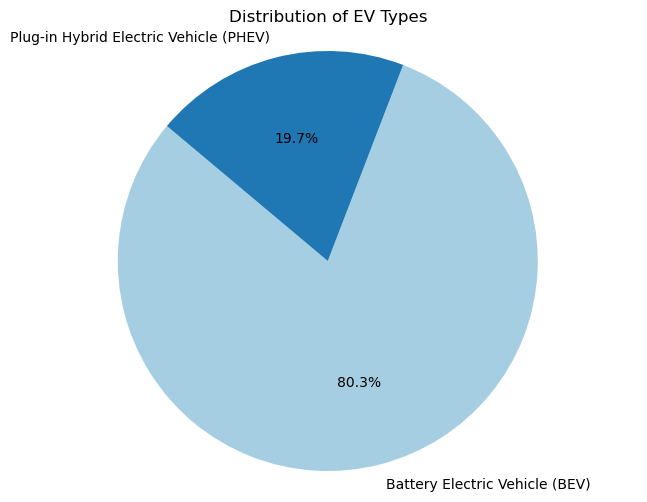

In [93]:
# Data Visualization


# Count the occurrences of each EV type
ev_counts = df['Electric_Vehicle_Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(ev_counts, labels=ev_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of EV Types')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


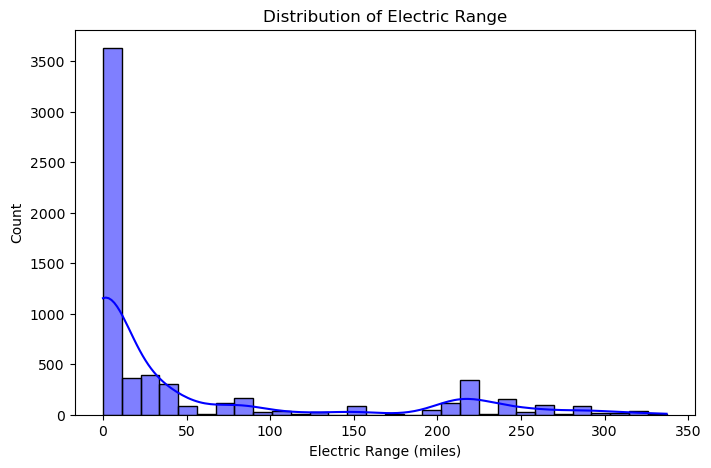

In [54]:
# Visualization: Distribution of Electric Range
plt.figure(figsize=(8,5))
sns.histplot(df['Electric_Range'], bins=30, kde=True, color='blue')
plt.xlabel("Electric Range (miles)")
plt.ylabel("Count")
plt.title("Distribution of Electric Range")
plt.show()


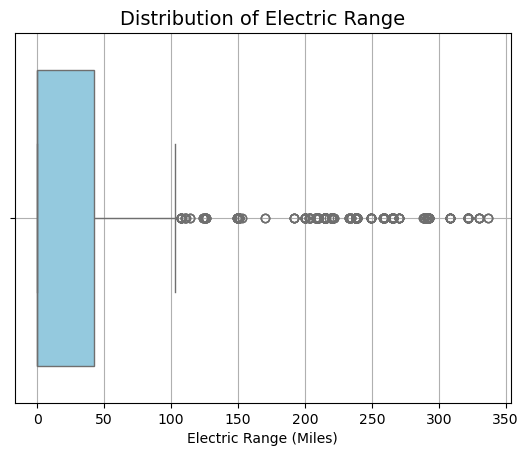

In [26]:
# Boxplot for Electric Range Distribution

plt.figure()
sns.boxplot(x=df['Electric_Range'], color='skyblue')
plt.title('Distribution of Electric Range', fontsize=14)
plt.xlabel('Electric Range (Miles)')
plt.grid(True)
plt.show()



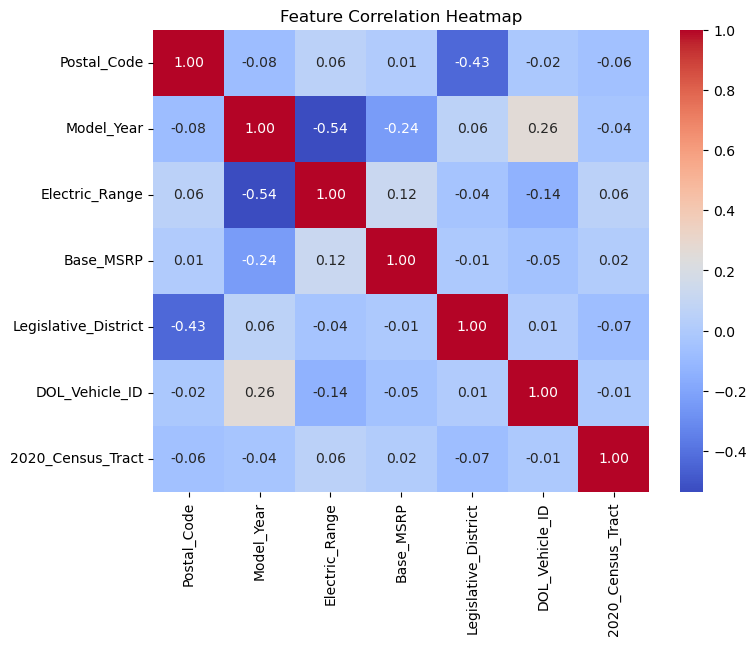

In [60]:
 #Correlation Heatmap

numeric_df = df.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()




<Axes: ylabel='Electric_Utility'>

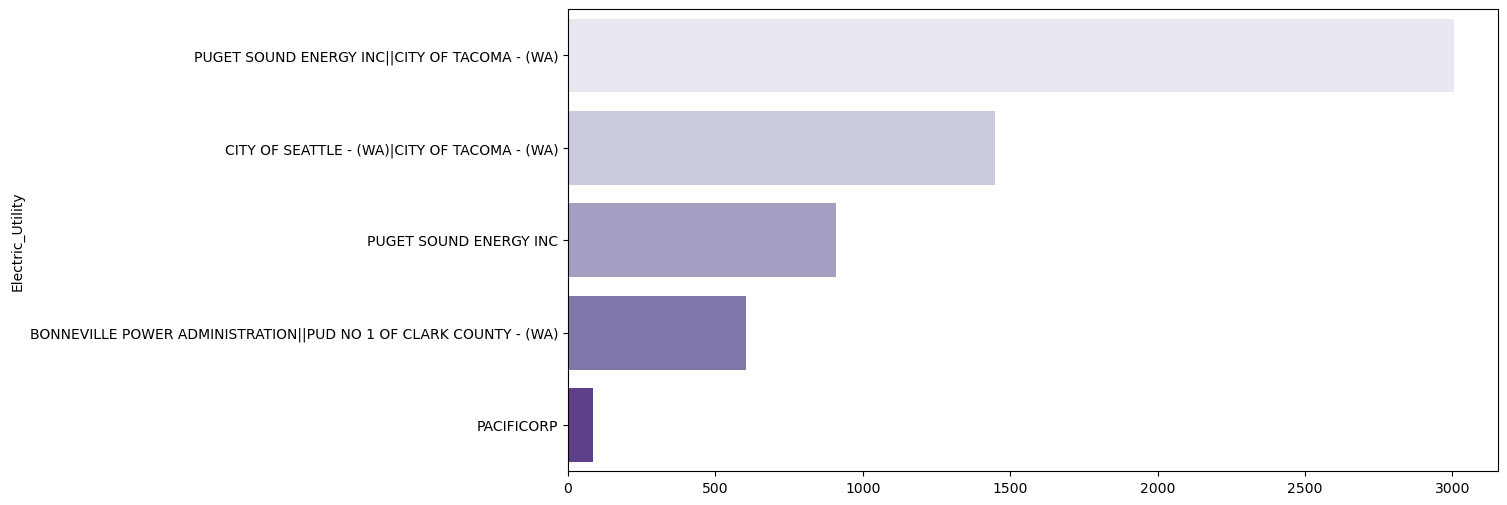

In [64]:
# Electricity Utility Usage

plt.figure(figsize=(12, 6))
top_utilities = df['Electric_Utility'].value_counts().head(5)
sns.barplot(x=top_utilities.values, y=top_utilities.index, hue=top_utilities.index, palette='Purples', legend=False)

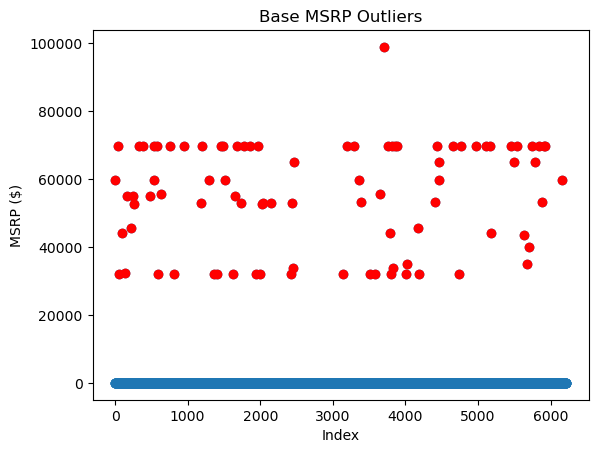

In [66]:
# IQR calculation
Q1 = df['Base_MSRP'].quantile(0.25)
Q3 = df['Base_MSRP'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Base_MSRP'] < Q1 - 1.5 * IQR) | (df['Base_MSRP'] > Q3 + 1.5 * IQR)]

# Basic scatter plot
plt.scatter(df.index, df['Base_MSRP'])
plt.scatter(outliers.index, outliers['Base_MSRP'], color='red')
plt.title('Base MSRP Outliers')
plt.xlabel('Index')
plt.ylabel('MSRP ($)')
plt.show()

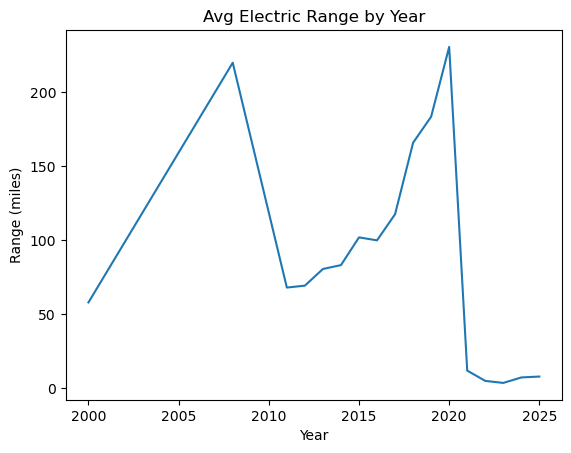

In [68]:
# Average electric range by model year
avg_range = df.groupby('Model_Year')['Electric_Range'].mean()

# Basic line plot
plt.plot(avg_range.index, avg_range.values)
plt.title('Avg Electric Range by Year')
plt.xlabel('Year')
plt.ylabel('Range (miles)')
plt.show()